# Thyroid Disease
### _By: Ankur Patel, Anika Patel_
---

### UCI Machine Learning Repository

| Data Set Characteristics: | Number of Instances: | Area: | Attribute Characteristics: | Number of Attributes: | Date Donated: | Associated Tasks: | Missing Values? |
| --- | --- | --- |
| Multivariate, Domain-Theory | 7200 | Life | Categorical, Real | 21 | 1987-01-01 | Classification | N/A |

##### Targets: Hypothyroid Classes (

The dataset was analyzed to predict the hypothyroid class using the data of 7200 observations for 22 attributes.

##### Ankur Patel: Task 1, 2 until Review(5)
##### Anika Patel: Task 3, 4 until Review(7)

### Visualization

- Univariate distributions of all features, jointly and per class

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import time
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
df_train = pd.read_csv("ann-train.data", sep=" ", header=None)
df_test = pd.read_csv("ann-test.data", sep=" ", header=None)

In [5]:
pd.set_option('display.max_columns', 100) #show all columns
df = df_train.append(df_test)
print(df.head())
df = df.iloc[:,:22]
print(df.head())

     0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15       16  \
0  0.73   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0  0.00060   
1  0.24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0.00025   
2  0.47   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0.00190   
3  0.64   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0.00090   
4  0.23   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0.00025   

      17     18     19     20  21  22  23  
0  0.015  0.120  0.082  0.146   3 NaN NaN  
1  0.030  0.143  0.133  0.108   3 NaN NaN  
2  0.024  0.102  0.131  0.078   3 NaN NaN  
3  0.017  0.077  0.090  0.085   3 NaN NaN  
4  0.026  0.139  0.090  0.153   3 NaN NaN  
     0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15       16  \
0  0.73   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0  0.00060   
1  0.24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0.00025   
2  0.47   0   0

In [6]:
cols = ["age", "sex", "on_thyroxine", "query_on_thyroxine", "on_antithyroid_medication",
        "sick", "pregnant", "thyroid_surgery", "I131_treatment", "query_hypothyroid",
        "query_hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary", "psych",
        "TSH", "T3", "TT4", "T4U", "FTI", "hypothyroid"]
df.columns = cols
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,hypothyroid
0,0.73,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


In [61]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,hypothyroid
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.520518,0.304306,0.130556,0.015417,0.012778,0.038333,0.010833,0.014028,0.016806,0.065556,0.068750,0.012639,0.008194,0.025556,0.000139,0.048889,0.004861,0.019977,0.109430,0.097838,0.113215,2.902778
std,0.189269,0.460145,0.336937,0.123212,0.112322,0.192013,0.103525,0.117613,0.128551,0.247521,0.253046,0.111718,0.090158,0.157816,0.011785,0.215651,0.022979,0.007539,0.035969,0.019085,0.036098,0.365923
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002000,0.017000,0.002000,1.000000
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000710,0.017000,0.089000,0.087000,0.095000,3.000000
50%,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001700,0.020100,0.107000,0.097000,0.111000,3.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002700,0.022000,0.125000,0.104000,0.127000,3.000000
max,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.530000,0.180000,0.600000,0.233000,0.642000,3.000000


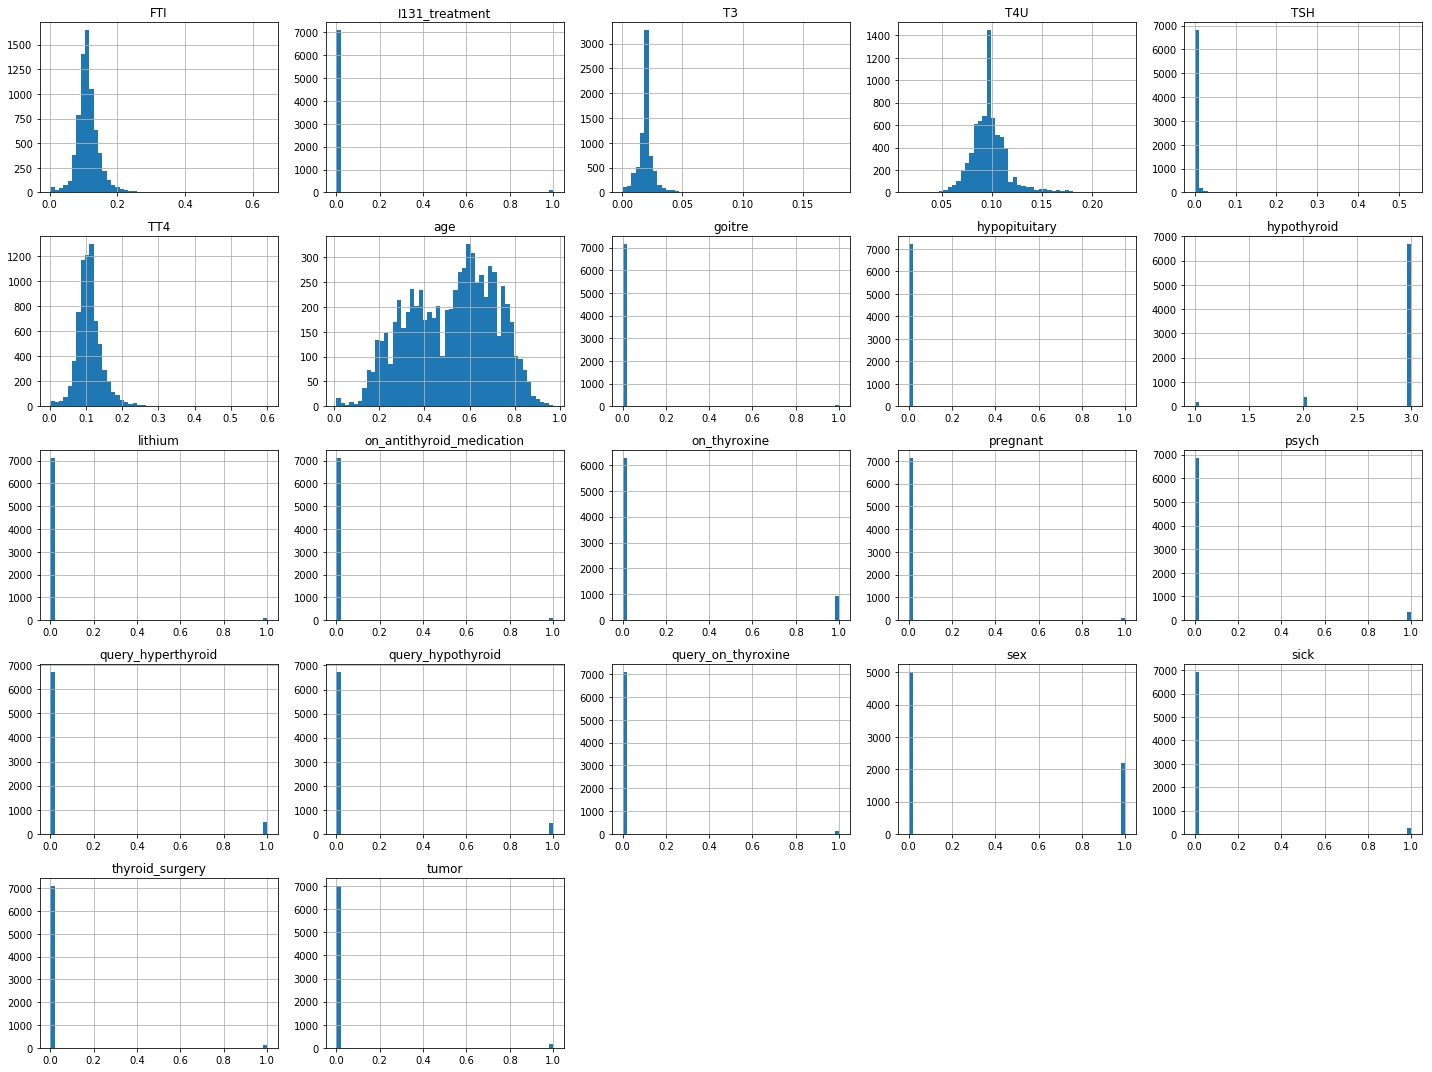

In [63]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()    
plt.show()

Text(0.5,0.98,'Hypothyroid 1, 2, 3')

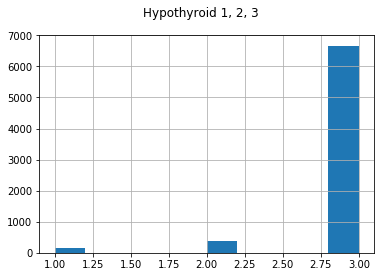

In [62]:
df["hypothyroid"].hist()
plt.suptitle("Hypothyroid 1, 2, 3")

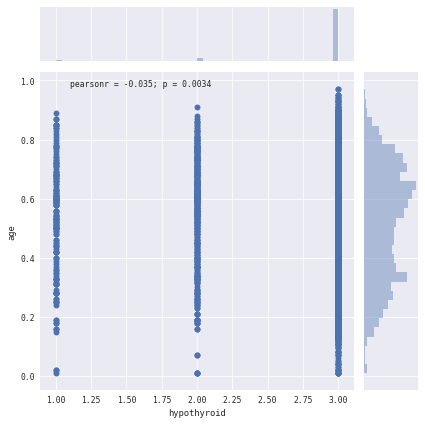

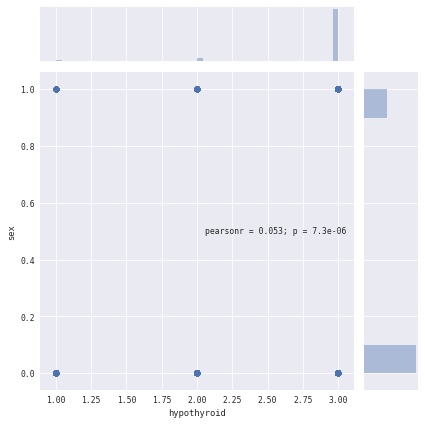

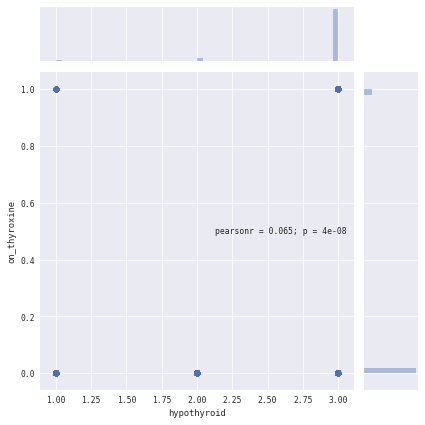

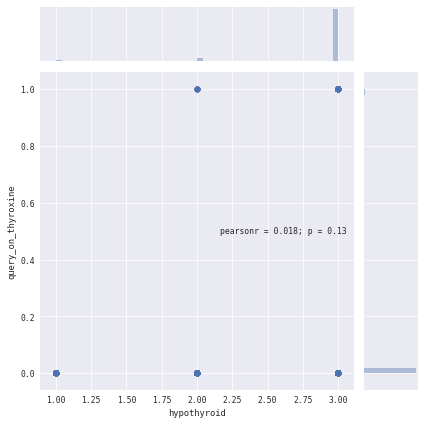

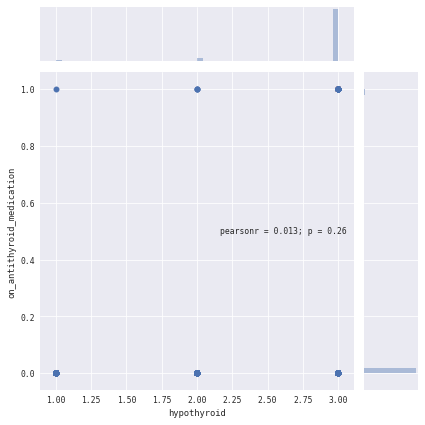

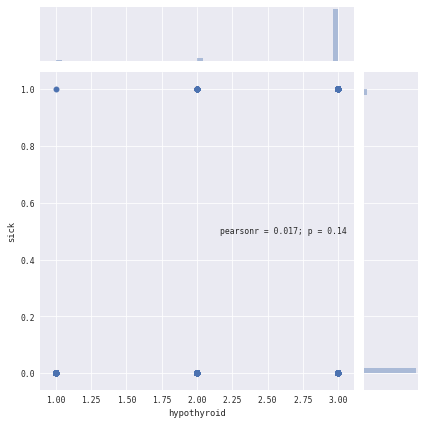

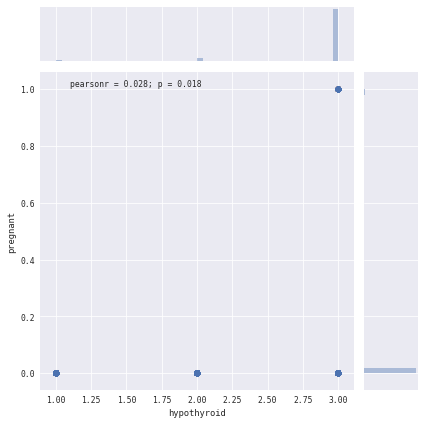

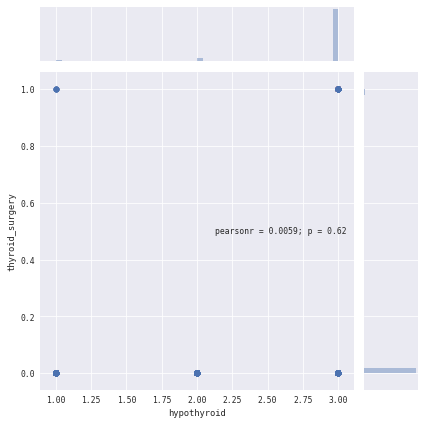

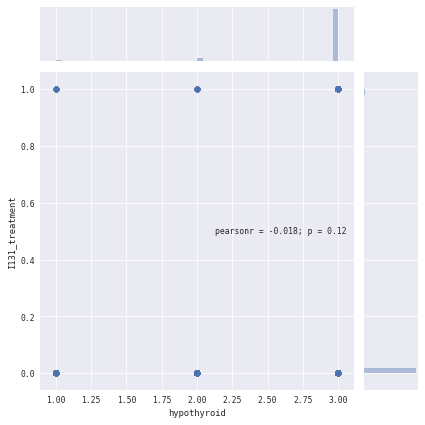

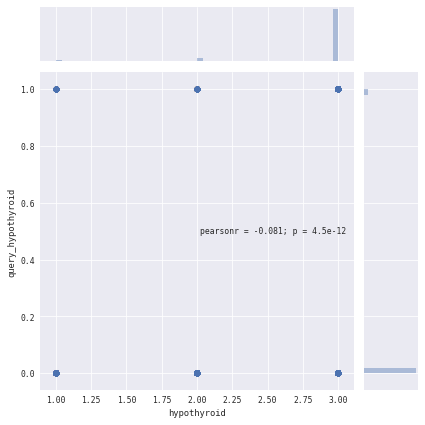

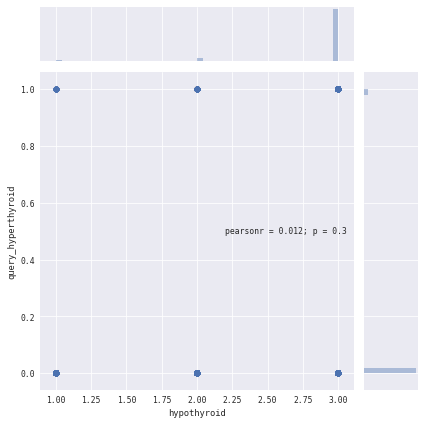

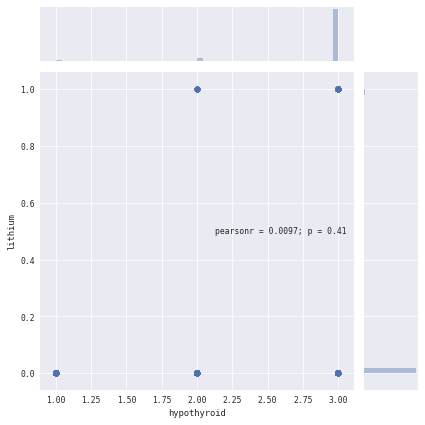

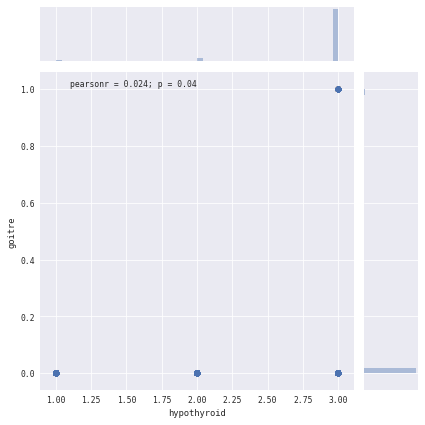

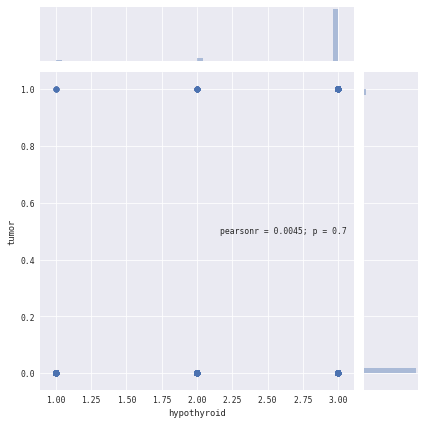

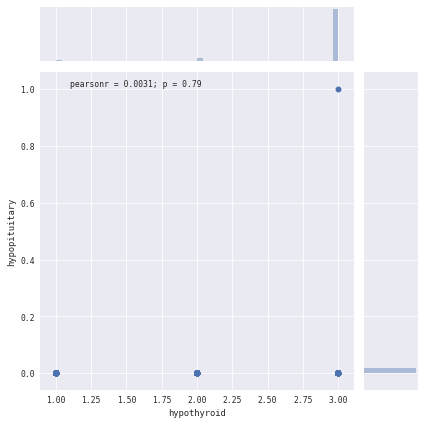

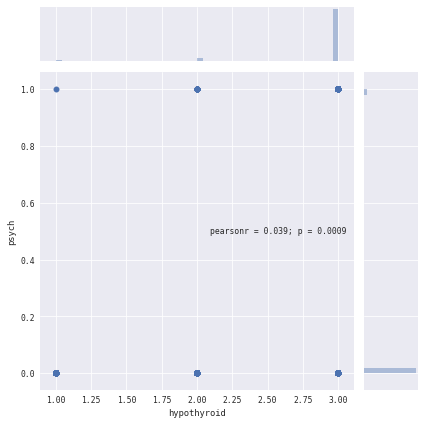

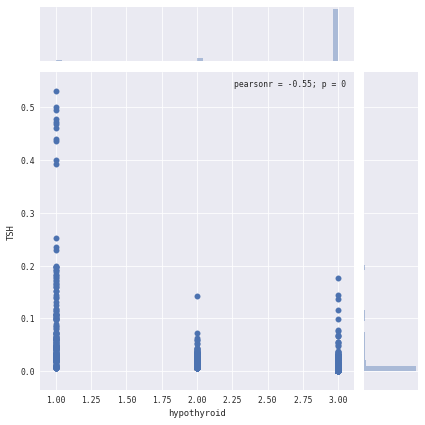

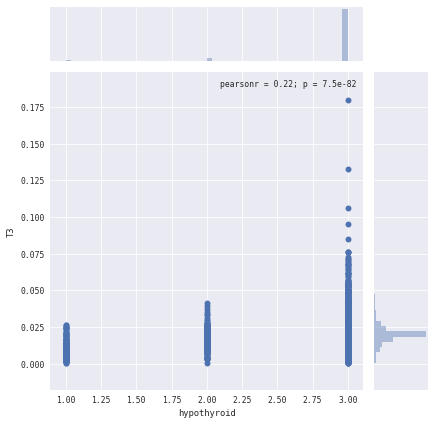

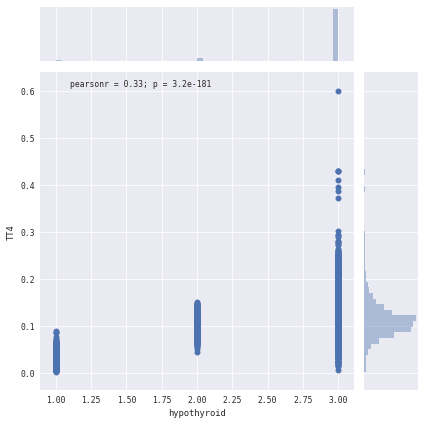

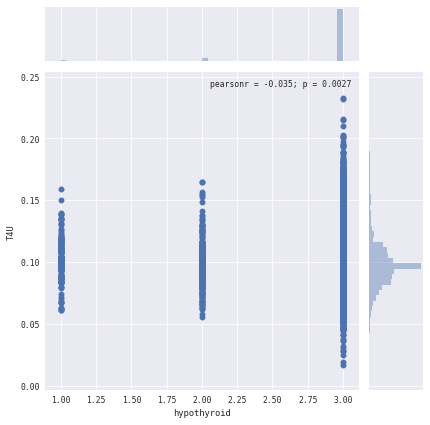

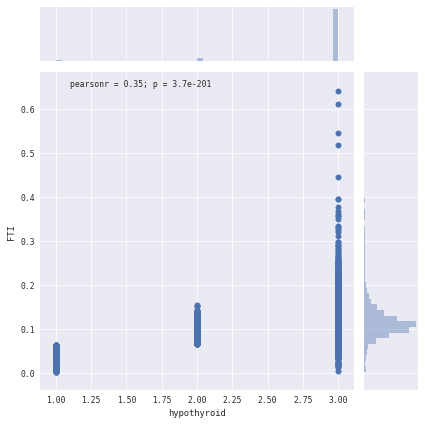

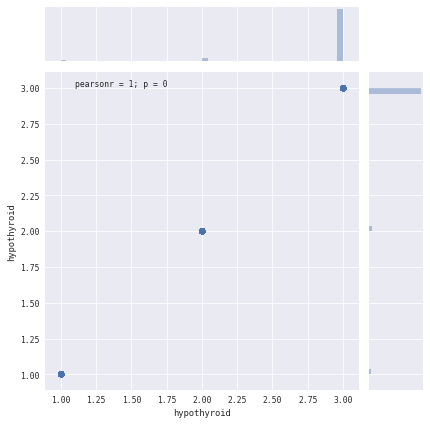

In [125]:
import warnings
warnings.filterwarnings("ignore")
for col in cols:
    sns.jointplot(x="hypothyroid", y=col, data=df, kind="scatter")

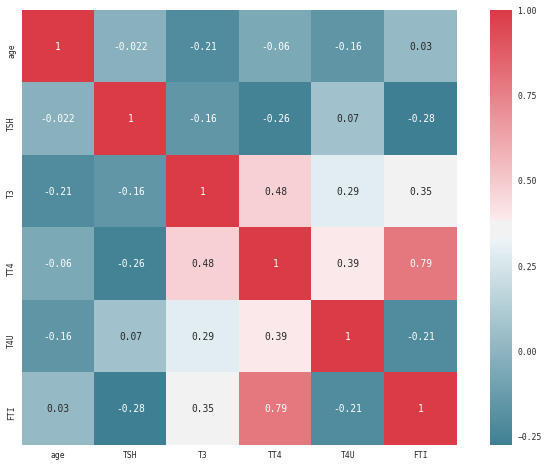

In [144]:
#continuous features correlation
df_cont = df.loc[:, df.dtypes == np.float64]
df_cont.head() 
sns.set(context="paper",font="monospace")
corr_matrix = df_cont.corr()
fig, axe = plt.subplots(figsize=(12,8))
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True) #color palettes
sns.heatmap(corr_matrix,vmax=1,square =True, cmap=cmap,annot=True ) #draw heatmap

TSH, T3, TT4, T4U, FTI, hypothyroid vs age, respectively in plots:


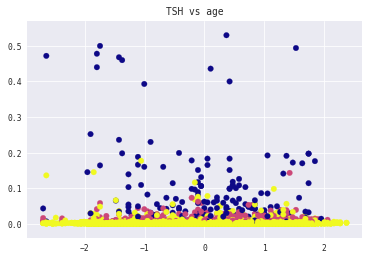

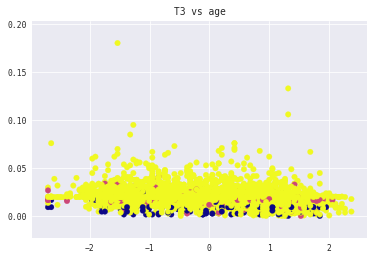

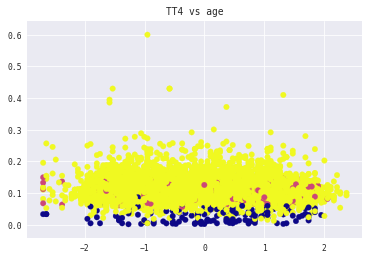

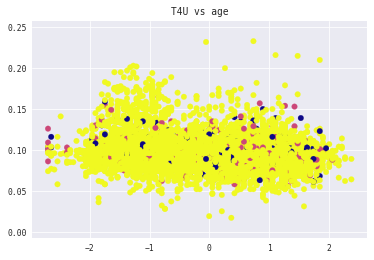

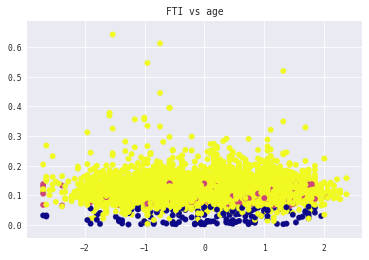

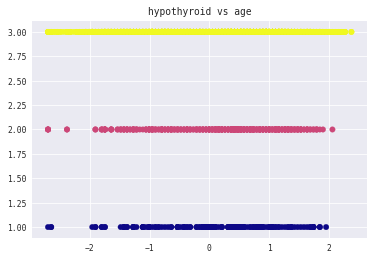

In [539]:
r = [16,17,18,19,20,21]
print("TSH, T3, TT4, T4U, FTI, hypothyroid vs age, respectively in plots:")
for i in r:
    plt.scatter(df_scaled.iloc[:,0], df.iloc[:,i], c=df["hypothyroid"], cmap="plasma")
    plt.title("{} vs age".format(cols[i]))
    plt.show()

### Review(1)

- The summary and the univariate distributions showed that the features are mainly binary. The continuous features, except for age, are skewed which indicates outliers. 
- The joint plots nicely showed the variation of the values as hypothyroid being the dependent. The continous features showed the scatter of the 3 hypothyroid classes, and the binary features showed the presence/absence of the hypothyroid classes.
- The last plots are for how the different hormones and hypothyroid levels are distributed according to age 

### PCA

Before PCA:  (7200, 22)


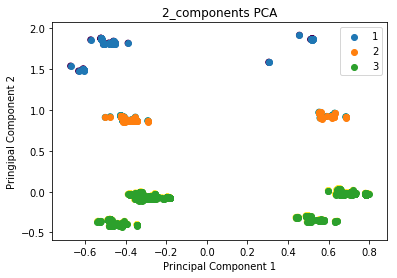

After PCA:  (7200, 2)
__________________________________________________


After the variance is scaled: 


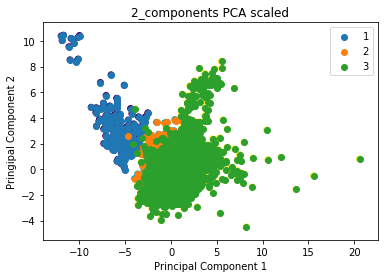

In [7]:
print("Before PCA: ", df.shape)
seed = 7
pca = PCA(n_components=2, random_state=seed)
df_pca = pca.fit_transform(df)
pca_2 = plt.scatter(df_pca[:,0], df_pca[:,1], c=df["hypothyroid"])
plt.title("2_components PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Pringipal Component 2")
y = df["hypothyroid"]
for label in np.unique(y):
    plt.scatter(df_pca[y==label, 0], df_pca[y==label, 1], label=label)
plt.legend()
plt.show()
print("After PCA: ", df_pca.shape)
print("__________________________________________________")

print("\n\nAfter the variance is scaled: ")
pca_scaled = PCA(n_components=2, random_state=seed)
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=cols)
df_pca_scaled = pca_scaled.fit_transform(df_scaled)
pca_2_scaled = plt.scatter(df_pca_scaled[:,0], df_pca_scaled[:,1], c=df["hypothyroid"])
plt.title("2_components PCA scaled")
plt.xlabel("Principal Component 1")
plt.ylabel("Pringipal Component 2")
for label in np.unique(y):
    plt.scatter(df_pca_scaled[y==label, 0], df_pca_scaled[y==label, 1], label=label)
plt.legend()
plt.show()

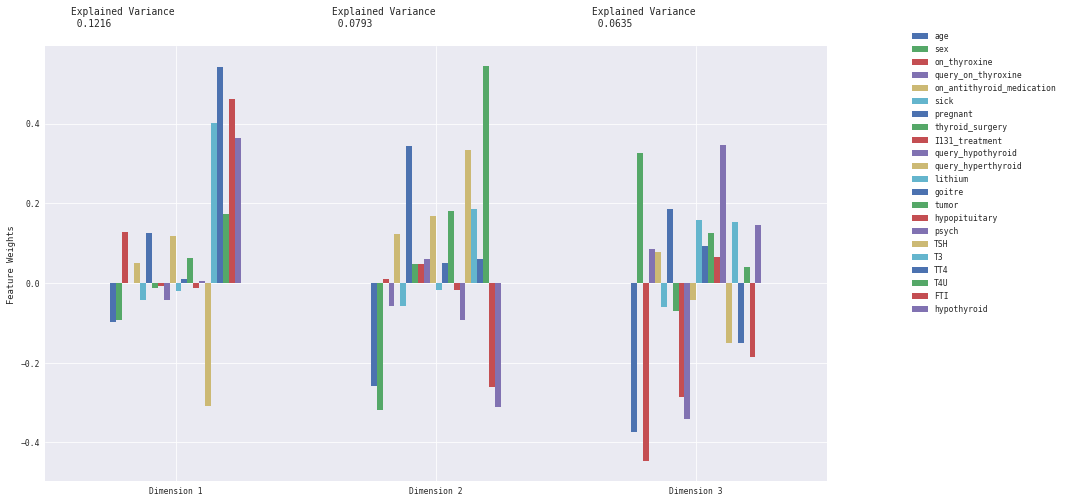

In [416]:
# PCA explained variance in the scaled df 

pca_scaled1 = PCA(n_components=3, random_state=seed)
df_pca_scaled1 = pca_scaled1.fit_transform(df_scaled)

def pca_results(df_scaled, pca_scaled1):
    
    # dimension indexing
    dimensions = ["Dimension {}".format(i) for i in range(1,len(pca_scaled1.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca_scaled1.components_, 4), columns = df_scaled.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca_scaled1.explained_variance_ratio_.reshape(len(pca_scaled1.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)
    ax.legend(bbox_to_anchor=(1.1, 1.05))


    # Display the explained variance ratios# 
    for i, ev in enumerate(pca_scaled1.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
pca_results = pca_results(df_scaled, pca_scaled1)

In [447]:
print("\nExplained Variance before scaling: ", pca.explained_variance_)
print("\nExplained Variance after scaling: ", pca_scaled.explained_variance_)
print("\nExplained Variance Ratio: ", pca_scaled.explained_variance_ratio_)
print("\nCummulative Sum: ", np.cumsum(pca_scaled.explained_variance_))


Explained Variance before scaling:  [0.21711495 0.13729494]

Explained Variance after scaling:  [2.6752391 1.7474937]

Explained Variance Ratio:  [0.12158489 0.0794205 ]

Cummulative Sum:  [2.6752391 4.4227328]


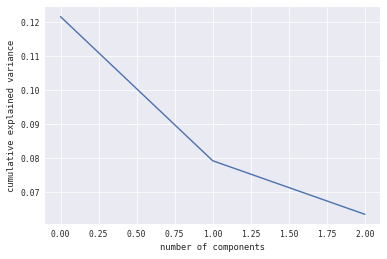

In [418]:
# explained variance
plt.plot(pca_scaled1.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### TSNE

After TSNE:  (7200, 2)


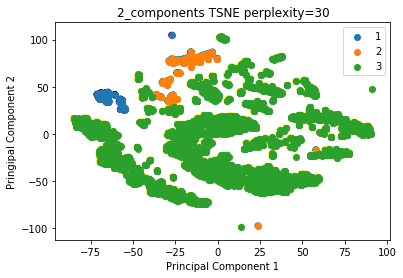

t-SNE done! Time elapsed: 361.24239444732666 seconds
__________________________________________________


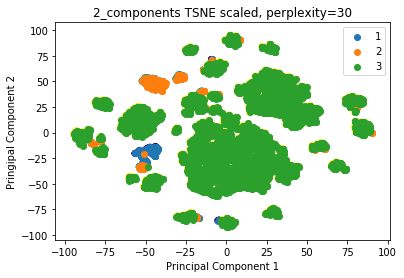

t-SNE done! Time elapsed: 710.7592749595642 seconds
__________________________________________________


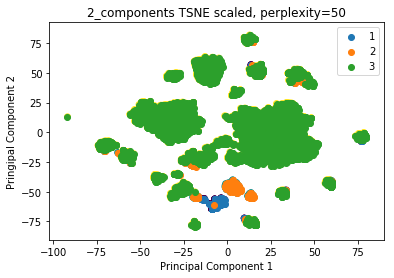

t-SNE done! Time elapsed: 1214.4934570789337 seconds
__________________________________________________


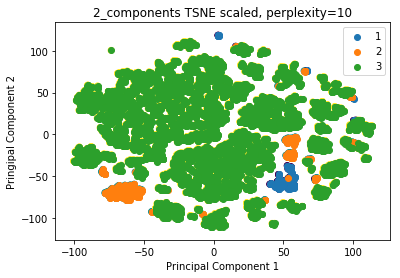

t-SNE done! Time elapsed: 1471.9490094184875 seconds


In [23]:
time_start = time.time()

df_tsne = TSNE(n_components=2, perplexity=30.0).fit_transform(df)
print("After TSNE: ", df_tsne.shape)
tsne = plt.scatter(df_tsne[:,0], df_tsne[:,1], c=df["hypothyroid"])
plt.title("2_components TSNE perplexity=30")
plt.xlabel("Principal Component 1")
plt.ylabel("Pringipal Component 2")
for label in np.unique(y):
    plt.scatter(df_tsne[y==label, 0], df_tsne[y==label, 1], label=label)
plt.legend()
plt.show()
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
print("__________________________________________________")

#####
df_tsne_scaled = TSNE(n_components=2, perplexity=30.0).fit_transform(df_scaled)
tsne_scaled = plt.scatter(df_tsne_scaled[:,0], df_tsne_scaled[:,1], c=df["hypothyroid"])
plt.title("2_components TSNE scaled, perplexity=30")
plt.xlabel("Principal Component 1")
plt.ylabel("Pringipal Component 2")
for label in np.unique(y):
    plt.scatter(df_tsne_scaled[y==label, 0], df_tsne_scaled[y==label, 1], label=label)
plt.legend()
plt.show()
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
print("__________________________________________________")

#####
df_tsne_scaled_50 = TSNE(n_components=2, perplexity=50.0).fit_transform(df_scaled)
tsne_scaled_50 = plt.scatter(df_tsne_scaled_50[:,0], df_tsne_scaled_50[:,1], c=df["hypothyroid"])
plt.title("2_components TSNE scaled, perplexity=50")
plt.xlabel("Principal Component 1")
plt.ylabel("Pringipal Component 2")
for label in np.unique(y):
    plt.scatter(df_tsne_scaled_50[y==label, 0], df_tsne_scaled_50[y==label, 1], label=label)
plt.legend()
plt.show()
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
print("__________________________________________________")

#####
df_tsne_scaled_10 = TSNE(n_components=2, perplexity=10.0).fit_transform(df_scaled)
tsne_scaled_10 = plt.scatter(df_tsne_scaled_10[:,0], df_tsne_scaled_10[:,1], c=df["hypothyroid"])
plt.title("2_components TSNE scaled, perplexity=10")
plt.xlabel("Principal Component 1")
plt.ylabel("Pringipal Component 2")
for label in np.unique(y):
    plt.scatter(df_tsne_scaled_10[y==label, 0], df_tsne_scaled_10[y==label, 1], label=label)
plt.legend()
plt.show()
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

### Review(2)

- The scaled PCA resulted in better classification plots than scaled TNSE.
- The number of principal components were recommended/chosen as 2 because of the 2 dimensional reduction. 
- Number of principal components, or k, can be chosen after choosing the threshold of variance % (0.01, 0.05, etc.) and calculated the variance using the average squared projection error and average variance. According to calculated ratio falling within the threshold, the k can be chosen.  
- PCA estimated variance decreased as number of components increased.
- Although adjusting perplexity seemed to display better clusters, the scaled TNSE didn't show different clusters for the hyperthyroid levels. Plus, the time elapsed...
- Increased perplexity created more clusters, as compared to perplexity=10, but it doesn't look for 3 hypothyroid classes

### Clustering

- KMeans, Agglomerative Clustering (with ward linkage) and DBSCAN to cluster the data
- Tune parameters and document
- Dendrogram for agglomerative clustering
- Outlier vs inlier class to evaluate using NMI and ARI scores

In [9]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage

### KMeans

KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

Cluster shape:  (3, 22)
Target shape:  (7200,)
Predict shape:  (7200,)


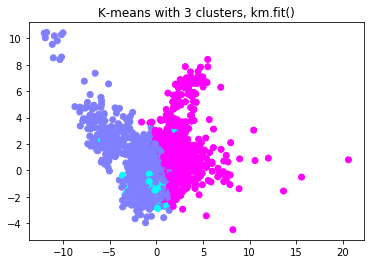

Predicted from km:  [2 2 1 ... 0 1 0]
Predciton accuracy:  0.025277777777777777
__________________________________________________


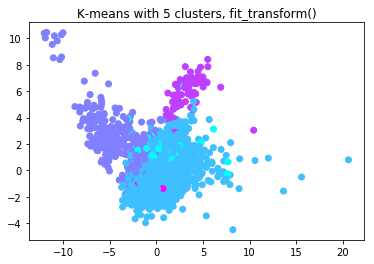

Predicted from tr_km:  [1 1 1 ... 1 1 1]
Predciton accuracy:  0.05875
__________________________________________________


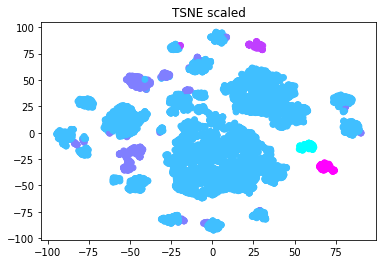

Predicted from tnse_km:  [2 2 1 ... 0 1 0]
Predciton accuracy:  0.025277777777777777
__________________________________________________


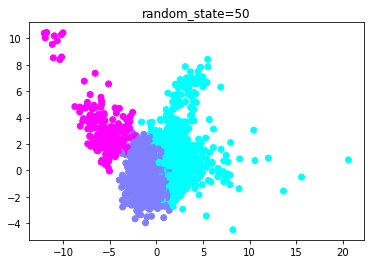

Predicted from tr_km_50:  [0 0 1 ... 1 1 1]
Predciton accuracy:  0.0006944444444444445
__________________________________________________


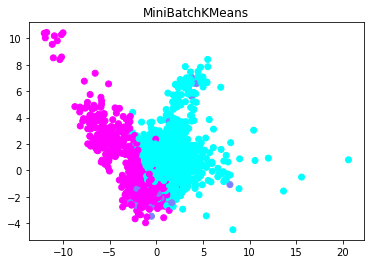

Predicted from m_km:  [0 0 0 ... 2 2 2]
Predciton accuracy:  0.034444444444444444
__________________________________________________


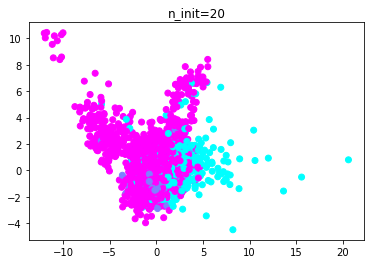

Predicted from m_km_20:  [0 2 2 ... 1 2 1]
Predciton accuracy:  0.04986111111111111


In [25]:
# n_clusters
true_k = np.unique(df["hypothyroid"]).shape[0]

km = KMeans(n_clusters=true_k, random_state=seed).fit(df_scaled) 
print("Cluster shape: ", km.cluster_centers_.shape)
print("Target shape: ", km.labels_.shape)
print("Predict shape: ", km.predict(df_scaled).shape) #same as labels but can be applied to new dataset

plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=km.labels_, cmap="cool")
plt.title("K-means with 3 clusters, km.fit()")
plt.show()
y_km = km.fit_predict(df_scaled)
print("Predicted from km: ", y_km)
print("Predciton accuracy: ", accuracy_score(y, y_km))
print("__________________________________________________")

#####
# fit_transform, n_cluster=5
tr_km = KMeans(n_clusters=5, random_state=seed)
tr_km.fit_transform(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=tr_km.labels_, cmap="cool")
plt.title("K-means with 5 clusters, fit_transform()")
plt.show()
y_tr_km = tr_km.fit_predict(df_scaled)
print("Predicted from tr_km: ", y_tr_km)
print("Predciton accuracy: ", accuracy_score(y, y_tr_km))
print("__________________________________________________")
# fit_transform() gave same results, but different hypothyroid classes were chosen with n_clusters=5 

#####
# fit_transform, TSNE
tnse_km = KMeans(n_clusters=true_k, random_state=seed)
tnse_km.fit_transform(df_scaled)
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=tr_km.labels_, cmap="cool")
plt.title("TSNE scaled")
plt.show()
y_tnse_km = tnse_km.fit_predict(df_scaled)
print("Predicted from tnse_km: ", y_tnse_km)
print("Predciton accuracy: ", accuracy_score(y, y_tnse_km))
print("__________________________________________________")
# the TSNE classes aren't as visibly comprehendable as PCA, so I'll stick to PCA when changing parameters 

##########
# fit_transform, max_iter=500, algorithm="full", random_state=50
tr_km_50 = KMeans(n_clusters=true_k, max_iter=500, random_state=50, algorithm="full")
tr_km_50.fit_transform(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=tr_km_50.labels_, cmap="cool")
plt.title("random_state=50")
plt.show()
y_tr_km_50 = tr_km_50.fit_predict(df_scaled)
print("Predicted from tr_km_50: ", y_tr_km_50)
print("Predciton accuracy: ", accuracy_score(y, y_tr_km_50))
print("__________________________________________________")
# max_iter didn't change classes, but changing the random_state changed it storing in a different randomness location... 
# resulted in a better classes formation

#####
# MiniBatchKMeans
m_km = MiniBatchKMeans(n_clusters=true_k, random_state=seed)
m_km.fit_transform(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=m_km.labels_, cmap="cool")
plt.title("MiniBatchKMeans")
plt.show()
y_m_km = m_km.fit_predict(df_scaled)
print("Predicted from m_km: ", y_m_km)
print("Predciton accuracy: ", accuracy_score(y, y_m_km))
print("__________________________________________________")
# different hypothyroid classes were chosen with MiniBatchKMeans 

#####
# MiniBatchKMeans, init='k-means++', tol=1, n_init=20
m_km_20 = MiniBatchKMeans(init="k-means++", n_clusters=true_k, random_state=seed, n_init=20, tol=1) #default n_init=19 
m_km_20.fit_transform(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=m_km_20.labels_, cmap="cool")
plt.title("n_init=20")
plt.show()
y_m_km_20 = m_km_20.fit_predict(df_scaled)
print("Predicted from m_km_20: ", y_m_km_20)
print("Predciton accuracy: ", accuracy_score(y, y_m_km_20))
# init="k-means++" and tol=1 didn't change anything, but n_init=20 changed classes

### AgglomerativeClustering

AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=’deprecated’)

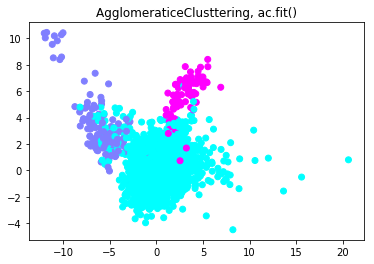



t-SNE done! Time elapsed: 2574.154717683792 seconds
Predicted from ac:  [0 0 0 ... 0 0 0]
Predciton accuracy:  0.017777777777777778
__________________________________________________


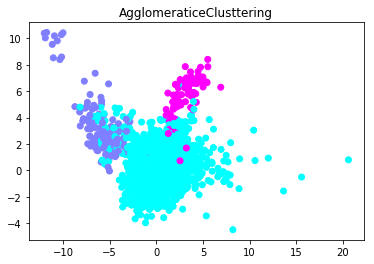



t-SNE done! Time elapsed: 2580.3134422302246 seconds
Predicted from ac_m:  [0 0 0 ... 0 0 0]
Predciton accuracy:  0.017777777777777778
__________________________________________________

To double check the identical results

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
__________________________________________________


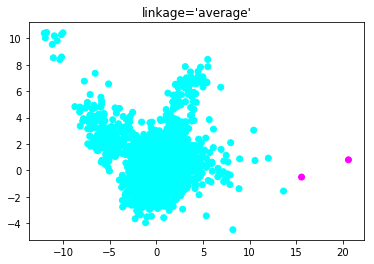



t-SNE done! Time elapsed: 2581.3951942920685 seconds
Predicted from ac_link:  [0 0 0 ... 0 0 0]
Predciton accuracy:  0.0


In [26]:
# only n_cluster=true_k
ac = AgglomerativeClustering(n_clusters=true_k)
ac.fit(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=ac.labels_, cmap="cool")
plt.title("AgglomeraticeClusttering, ac.fit()")
plt.show()
print('\n\nt-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
y_ac = ac.fit_predict(df_scaled)
print("Predicted from ac: ", y_ac)
print("Predciton accuracy: ", accuracy_score(y, y_ac))
print("__________________________________________________")
# only tested the classes the change of cluster method

#####
# memory to string "seed", compute_full_tree="bool" or "auto" 
ac_m = AgglomerativeClustering(n_clusters=true_k, memory="seed", compute_full_tree="auto", 
                             linkage="ward")
ac_m.fit(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=ac_m.labels_, cmap="cool")
plt.title("AgglomeraticeClusttering")
plt.show()
print('\n\nt-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
y_ac_m = ac_m.fit_predict(df_scaled)
print("Predicted from ac_m: ", y_ac_m)
print("Predciton accuracy: ", accuracy_score(y, y_ac_m))
print("__________________________________________________")
# only some parameters were changed, but they didn't change the results

#####
print("\nTo double check the identical results\n")
print(y_ac[20:100])
print(y_ac_m[20:100])
print("__________________________________________________")

#####
# linkage="complete" or "average" just to see difference 
ac_link = AgglomerativeClustering(n_clusters=true_k, memory="seed", compute_full_tree="auto", 
                             linkage="average")
ac_link.fit(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=ac_link.labels_, cmap="cool")
plt.title("linkage='average'")
plt.show()
print('\n\nt-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
y_ac_link = ac_link.fit_predict(df_scaled)
print("Predicted from ac_link: ", y_ac_link)
print("Predciton accuracy: ", accuracy_score(y, y_ac_link))
# the linkage chooses all values to only 1 class, with only a couple in other class for both complete and average, which is...
# possibly why ward was recommended

### DNSCAN

DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’, metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=None)

In [ ]:
#################################################################################################################### 
34 vvv

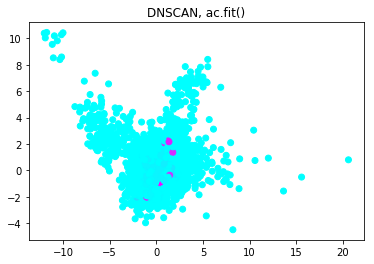

Predicted from db:  [-1 34 -1 ... -1  0 -1]
Predciton accuracy:  0.03277777777777778
__________________________________________________


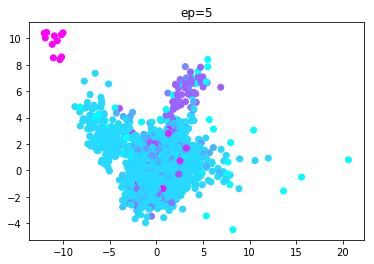

Predicted from db_5:  [-1 34 -1 ... -1  0 -1]
Predciton accuracy:  0.03277777777777778
__________________________________________________


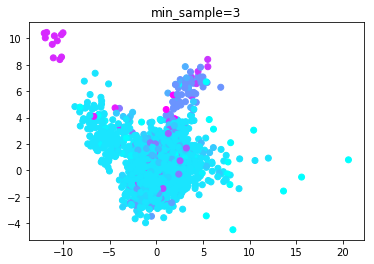

Predicted from db_3:  [-1 34 -1 ... -1  0 -1]
Predciton accuracy:  0.03277777777777778
__________________________________________________


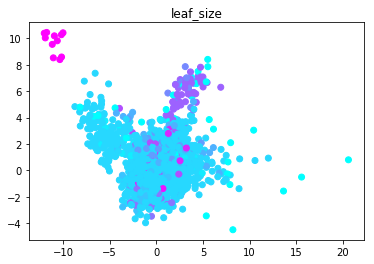

Predicted from db_ls:  [-1 34 -1 ... -1  0 -1]
Predciton accuracy:  0.03277777777777778
__________________________________________________


In [28]:
# default
db = DBSCAN().fit(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=db.labels_, cmap="cool")
plt.title("DNSCAN, ac.fit()")
plt.show()
y_db = db.fit_predict(df_scaled)
print("Predicted from db: ", y_db)
print("Predciton accuracy: ", accuracy_score(y, y_db))
print("__________________________________________________")
# the default parameters resulted showed mainly 1 class and not distributed

#####
# eps= 5 
db_5 = DBSCAN(eps=5, algorithm="ball_tree").fit(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=db_5.labels_, cmap="cool")
plt.title("ep=5")
plt.show()
y_db_5 = db.fit_predict(df_scaled)
print("Predicted from db_5: ", y_db_5)
print("Predciton accuracy: ", accuracy_score(y, y_db_5))
print("__________________________________________________")
# eps=5 gave best class difference
# algorithms can't work here because they're used for NearestNeighbors module 

#####
# min_samples=3
db_3 = DBSCAN(eps=5, min_samples=3).fit(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=db_3.labels_, cmap="cool")
plt.title("min_sample=3")
plt.show()
y_db_3 = db.fit_predict(df_scaled)
print("Predicted from db_3: ", y_db_3)
print("Predciton accuracy: ", accuracy_score(y, y_db_3))
print("__________________________________________________")
# min_samples=3 seen to work most but it barely changed the classes
# metric cannot be precomputed as X is not a distance matrix, so set as default "euclidean" and no need to try metric_params

#####
# leaf_size, p, n_jobs
time_start = time.time()
db_ls = DBSCAN(eps=5, leaf_size=5, p=50.0, n_jobs=-50).fit(df_scaled)
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], c=db_ls.labels_, cmap="cool")
plt.title("leaf_size")
plt.show()
y_db_ls = db.fit_predict(df_scaled)
print("Predicted from db_ls: ", y_db_ls)
print("Predciton accuracy: ", accuracy_score(y, y_db_ls))
print("__________________________________________________")
# leaf_size doesn't change the plot, but it can effect the speef of contruction. Larger leaf_size = faster time. 
# It is used for time-consumption for KNN. It took 25seconds with the default n_jobs=1.
# p is Minkowski metric to be used to calculate distance between points, and doesn't effect the plot.
# n_ jobs runs the specified number of parallel jobs, and more negative = more time elapsed

### Review(3)

- Best parameters (mentioned in ###) for each tuned clustering method:
    - KMeans:     tr_km = KMeans(n_clusters=5, random_state=seed) ###n_clusters=5
        - this model had simple convex cluster shapes; size of clusters correlated with the histogram of hypothyroid column
    - AggClus:    ac = AgglomerativeClustering(n_clusters=true_k, memory="seed", linkage="ward")  ###default   
    - DBSCAN:     db_5 = DBSCAN(eps=5, algorithm="ball_tree").fit(df_scaled) ###eps=5

These were chosen according to the distribution of the hypothyroid classes.

### Dendrogram

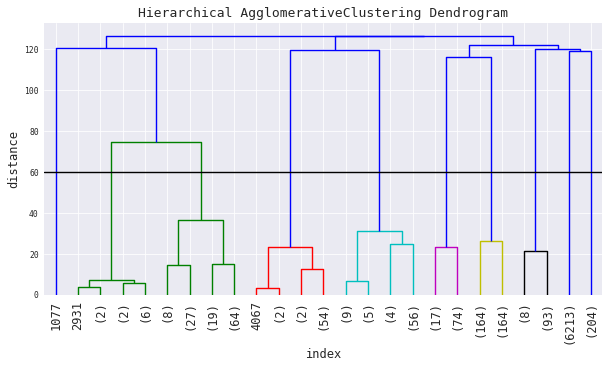

In [582]:
fig = plt.figure(figsize=(10,5))
plt.title("Hierarchical AgglomerativeClustering Dendrogram", fontsize=13)
plt.xlabel("index", fontsize=12)
plt.ylabel("distance", fontsize=12)
Z = linkage(df_scaled, "ward")
dendrogram(
    Z,
    p=4, #change to include/cut the number of clusters
    truncate_mode="level",
    labels=df_scaled.index,
    leaf_rotation=90,  #rotates the x axis labels
    leaf_font_size=12,  #font size for the x axis labels
)
plt.axhline(y=60, xmin=0.0, xmax=1.0, color="k")
plt.show()

### NMI

In [22]:
from sklearn.metrics import normalized_mutual_info_score

In [23]:
X = df_scaled.iloc[:,:22]
y1 = df_scaled["hypothyroid"]

In [38]:
# KMeans NMI
km_preds = [y_km, y_tr_km, y_tnse_km, y_tr_km_50, y_m_km, y_m_km_20]
km_preds_names = ["y_km", "y_tr_km", "y_tnse_km", "y_tr_km_50", "y_m_km", "y_m_km_20"]
for i in range(len(km_preds)):
    print("Performance of {}: {}".format(km_preds_names[i], normalized_mutual_info_score(y1, km_preds[i])))

Performance of y_km: 0.037748386322927624
Performance of y_tr_km: 0.6441120193058726
Performance of y_tnse_km: 0.037748386322927624
Performance of y_tr_km_50: 0.24775342102733622
Performance of y_m_km: 0.07763706984656409
Performance of y_m_km_20: 0.028075464640441916


In [40]:
# AgglomerativeClustering NMI
ac_preds = [y_ac, y_ac_m, y_ac_link]
ac_preds_names = ["y_ac", "y_ac_m", "y_ac_link"]
for i in range(len(ac_preds)):
    print("Performance of {}: {}".format(ac_preds_names[i], normalized_mutual_info_score(y1, ac_preds[i])))

Performance of y_ac: 0.3229223109429719
Performance of y_ac_m: 0.3229223109429719
Performance of y_ac_link: 0.0009203444791489814


In [41]:
# DBSCAN NMI
db_preds = [y_db, y_db_5, y_db_3, y_db_ls]
db_preds_names = ["y_db", "y_db_5", "y_db_3", "y_db_ls"]
for i in range(len(db_preds)):
    print("Performance of {}: {}".format(db_preds_names[i], normalized_mutual_info_score(y1, db_preds[i])))

Performance of y_db: 0.08423202944476284
Performance of y_db_5: 0.08423202944476284
Performance of y_db_3: 0.08423202944476284
Performance of y_db_ls: 0.08423202944476284


### API

In [43]:
from sklearn.metrics import adjusted_mutual_info_score

In [44]:
# KMeans API
km_preds = [y_km, y_tr_km, y_tnse_km, y_tr_km_50, y_m_km, y_m_km_20]
km_preds_names = ["y_km", "y_tr_km", "y_tnse_km", "y_tr_km_50", "y_m_km", "y_m_km_20"]
for i in range(len(km_preds)):
    print("Performance of {}: {}".format(km_preds_names[i], adjusted_mutual_info_score(y1, km_preds[i])))

Performance of y_km: 0.02381229571157584
Performance of y_tr_km: 0.5347592694693659
Performance of y_tnse_km: 0.02381229571157584
Performance of y_tr_km_50: 0.16697454632708725
Performance of y_m_km: 0.05055626471069864
Performance of y_m_km_20: 0.019877596389492918


In [45]:
# AgglomerativeClustering API
ac_preds = [y_ac, y_ac_m, y_ac_link]
ac_preds_names = ["y_ac", "y_ac_m", "y_ac_link"]
for i in range(len(ac_preds)):
    print("Performance of {}: {}".format(ac_preds_names[i], adjusted_mutual_info_score(y1, ac_preds[i])))

Performance of y_ac: 0.24665713700401748
Performance of y_ac_m: 0.24665713700401748
Performance of y_ac_link: -0.000226712062579312


In [47]:
# DBSCAN API
db_preds = [y_db, y_db_5, y_db_3, y_db_ls]
db_preds_names = ["y_db", "y_db_5", "y_db_3", "y_db_ls"]
for i in range(len(db_preds)):
    print("Performance of {}: {}".format(db_preds_names[i], adjusted_mutual_info_score(y1, db_preds[i])))

Performance of y_db: 0.03603578815946628
Performance of y_db_5: 0.03603578815946628
Performance of y_db_3: 0.03603578815946628
Performance of y_db_ls: 0.03603578815946628


### Review(4)

- The best NMI performance was from y_tr_km, with a score of 0.6441120193058726.
- The best ARI performance was from y_tr_km, with a score of 0.5347592694693659.
- No parameters to be adjusted in those methods.

Best Model:
- Since the y_t_km model gave the highest score for both NMI and ARI, as well as the best distribution after tuning the parameters for t_km model, the  "tr_km = KMeans(n_clusters=5, random_state=seed)"  model was seen as the best model.

In [30]:
from sklearn.neighbors import LocalOutlierFactor

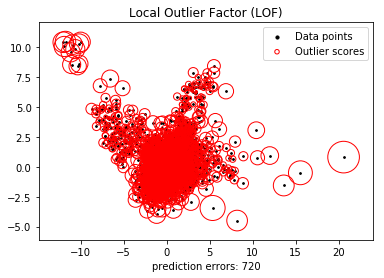

In [45]:
ground_truth = np.ones(len(df_pca_scaled), dtype=int)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(df_pca_scaled)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], color='k', s=3, label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper right")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

### Review (5)
- LOC was used to visualize the outliers' locations and their density deviation from their neighbors (lower density = outlier).
- The plot shows a brief view of the outliers, but their count will be calculated next using outlier detection methods.

##### Task 4 Imbalanced Classification

##### Threat the problem as an imbalanced classification problem using LogisticRegression and RandomForestClassifier. Compare your results with the outlier detection in terms of AUC and average precision. Tune C and a regularization mechanism for the random forest. Does changing the class-weight to “balanced” help?

In [2]:
import scipy.io as sio

In [3]:
contents = sio.loadmat('annthyroid.mat')

In [4]:
contents.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 18 14:56:12 2016'), ('__version__', '1.0'), ('__globals__', []), ('X', array([[7.30e-01, 6.00e-04, 1.50e-02, 1.20e-01, 8.20e-02, 1.46e-01],
       [2.40e-01, 2.50e-04, 3.00e-02, 1.43e-01, 1.33e-01, 1.08e-01],
       [4.70e-01, 1.90e-03, 2.40e-02, 1.02e-01, 1.31e-01, 7.80e-02],
       ...,
       [5.10e-01, 7.60e-04, 2.01e-02, 9.00e-02, 6.70e-02, 1.34e-01],
       [3.50e-01, 2.80e-03, 2.01e-02, 9.00e-02, 8.90e-02, 1.01e-01],
       [7.30e-01, 5.60e-04, 2.01e-02, 8.10e-02, 9.00e-02, 9.00e-02]])), ('y', array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8))])

In [5]:
target = contents['X']

In [6]:
labels = contents['y']

In [7]:
print(target.shape)

(7200, 6)


In [8]:
print(labels)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [9]:
import seaborn as sns
from scipy import stats

In [10]:
x_train, x_test = target[:3772], target[3428:]
y_train, y_test = labels[:3772], labels[3428:]

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
####Logistic Regression

import warnings
warnings.filterwarnings("ignore")
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
AUC = auc(fpr, tpr)
aps = average_precision_score(y_test, classifier.predict_proba(x_test)[:,1])

In [15]:
print("Confusion Matrix:\n", cm)
print("\nAUC: ", AUC)
print("\nAPS: ", aps)

Confusion Matrix:
 [[3455   36]
 [ 156  125]]

AUC:  0.7172638130994698

APS:  0.7138405979031239


In [16]:
##Tuning parameters C for Logistic Regression
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
#Tuning parameter C for logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

clf = GridSearchCV(LogisticRegression(penalty='l2',random_state=0), param_grid)
clf.fit(x_train, y_train)




GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
# Predicting the Test set results
y_pred = clf.predict(x_test)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
AUC = auc(fpr, tpr)
aps = average_precision_score(y_test, clf.predict_proba(x_test)[:,1])

In [19]:
print("Confusion Matrix:\n", cm)
print("\nAUC: ", AUC)
print("\nAPS: ", aps)

Confusion Matrix:
 [[3454   37]
 [ 153  128]]

AUC:  0.7224586659544471

APS:  0.7198105345527581


We can observe the AUC score and precision score for logistic regression one without tuning the parameter and one by tuning the parameter. We can see that AUC score increase by tuning C for logistic Refression

AUC:  0.7172638130994698  (without tuning parameter)
AUC:  0.7224586659544471  (by tuning C parameter)
APS : 0.7138405979031239  (without tuning parameter)
APS:  0.7198105345527581  (by tuning parameter C)

In [20]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
# Predicting the Test set results
y_pred1 = classifier1.predict(x_test)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score
cm1 = confusion_matrix(y_test, y_pred1)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred1)
AUC1 = auc(fpr1, tpr1)
aps1 = average_precision_score(y_test, classifier1.predict_proba(x_test)[:,1])

In [23]:
print("Confusion Matrix:\n", cm1)
print("\nAUC: ", AUC1)
print("\nAPS: ", aps1)

Confusion Matrix:
 [[3440   51]
 [  51  230]]

AUC:  0.9019481717604293

APS:  0.8557481596416896


In [24]:
#changing class_weight to balanced
classifier11 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,class_weight='balanced')
classifier11.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [25]:
# Predicting the Test set results
y_pred11 = classifier11.predict(x_test)

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score
cm11 = confusion_matrix(y_test, y_pred11)
fpr11, tpr11, threshold11 = roc_curve(y_test, y_pred11)
AUC11 = auc(fpr11, tpr11)
aps11 = average_precision_score(y_test, classifier11.predict_proba(x_test)[:,1])

In [27]:
print("Confusion Matrix:\n", cm11)
print("\nAUC: ", AUC11)
print("\nAPS: ", aps11)

Confusion Matrix:
 [[3436   55]
 [  50  231]]

AUC:  0.9031546294436839

APS:  0.86145595427995


In [29]:
import numpy as np
#Tuning the paramters for Random Forest
max_depths = np.linspace(1, 32, 32)

for max_depth in max_depths:
    classifier_tune = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,max_depth=max_depth)
    classifier_tune.fit(x_train, y_train) 
    # Predicting the Test set results
    y_pred_tune = classifier11.predict(x_test)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score
    cm22 = confusion_matrix(y_test, y_pred_tune)
    fpr22, tpr22, threshold22 = roc_curve(y_test, y_pred_tune)
    AUC22 = auc(fpr22, tpr22)
    aps22 = average_precision_score(y_test, classifier_tune.predict_proba(x_test)[:,1])

   
    

In [30]:
print("Confusion Matrix:\n", cm22)
print("\nAUC: ", AUC22)
print("\nAPS: ", aps22)
print("\n\n")


Confusion Matrix:
 [[3436   55]
 [  50  231]]

AUC:  0.9031546294436839

APS:  0.8557481596416896





Random forest classifier has good accuracy score. here as we can see above that Random forest has been implemented with class_weight as balanced gives AUC score of 90.31 and Precision score of 86.14

We tried to tune max_depth for Random Forest classifier. We can observe that there is not much difference in the AUC and APC score.

##### Task 3 Outlier Detection

##### 3.1 Assume that you know the proportion of outliers. Use EllipticEnvelope, OneClassSVM and IsolationForest to detect outliers. Without using the ground-truth, can you tell which one gave the best results? Why?

##### 3.2 Use the ground-truth to evaluate the different outlier detection approaches using AUC and average precision. How can you compare their quality to the clustering approaches from Task 2?

3.1 Assume that you know the proportion of outliers. Use EllipticEnvelope, OneClassSVM and IsolationForest to detect outliers. Without using the ground-truth, can you tell which one gave the best results? Why?

In [31]:
import numpy as np
import pandas as pd
test = pd.read_csv('ann-test.data',sep="\s+",header=None,)
train = pd.read_csv('ann-train.data',sep="\s+",header=None,)
X = pd.concat([train, test])
y = X.iloc[:, -1]
X = X.drop(21, axis=1)

In [32]:
#Assuming that I know the proportion of outliers as 0.10 I will use contamination value as .10
#predicting the outliers using EllipticEnvelope
from sklearn.covariance import EllipticEnvelope
ee= EllipticEnvelope(contamination=.10).fit(X)         
pred=ee.predict(X)
print(pred)     # Outlier points are predicted as -1
print(sum(pred==-1))

[1 1 1 ... 1 1 1]
720


In [33]:
#Assuming that I know the proportion of outliers as 0.25 I will use contamination value as .25
#predicting the outliers using EllipticEnvelope

from sklearn.covariance import EllipticEnvelope
ee= EllipticEnvelope(contamination=.25).fit(X)         
pred=ee.predict(X)
print(pred)     # Outlier points are predicted as -1

[ 1  1 -1 ... -1  1  1]


In [34]:
print(sum(pred==-1))

1800


Predicting outlier with OneClassSVM

In [51]:
# predicting the outliers using OneClassSVM
fraction=0.10
from sklearn.svm import OneClassSVM
ocs=OneClassSVM(nu=0.95 * fraction + 0.05,kernel="rbf", gamma=0.1)
ocs.fit(x_train)
pred_out=ocs.predict(x_test)
print(pred_out)
print(sum(pred_out))

[ 1 -1  1 ...  1  1  1]
2442


In [38]:
# predicting the outliers using OneClassSVM
fraction=0.25
from sklearn.svm import OneClassSVM
ocs=OneClassSVM(nu=0.95 * fraction + 0.05,kernel="rbf", gamma=0.1)
ocs.fit(X)
pred_out=ocs.predict(X)
print(pred_out)

[-1  1  1 ...  1  1 -1]


In [39]:
print(sum(pred_out))

3060


Predicting Outlier with Isolation Forest method

In [44]:
#contamination of 0.10

from sklearn.ensemble import IsolationForest
import numpy as np
rng = np.random.RandomState(42)
# training the model
iso_clf = IsolationForest(behaviour='new',random_state=rng, contamination=.10)
iso_clf.fit(X)

pred_iso_out=iso_clf.predict(X)
print(pred_iso_out)
print(sum(pred_iso_out))

[-1  1  1 ...  1  1  1]
5760


In [45]:
from sklearn.ensemble import IsolationForest
import numpy as np
rng = np.random.RandomState(42)
# training the model
iso_clf = IsolationForest(behaviour='new',random_state=rng, contamination=.25)
iso_clf.fit(X)

pred_iso_out=iso_clf.predict(X)
print(pred_iso_out)

[-1  1  1 ... -1  1 -1]


In [46]:
print(sum(pred_iso_out))

3600


After performing the outlier detection methods i.e EllipticEnvelope, IsolationForest and OneClassSVM we conclude that Isolation forest works best in identifying the number of outliers in the dataset. It detects almost 20% of data as outliers which is close to the assumption made by us for the fraction of outliers. 

We tried different proportion for the assumption of number of outliers. First we tried with contamination as 0.10 and we concluded that all the three methods has vast difference in giving the number of outliers.
So we tried again with contamination of 0.25 and we can see that the results for all the methods is almost close to each other.

EllipticEnvelope and OneClassSVM gives approximately 16% of outliers from the dataset for the contamination assumtion of 0.25

###### 3.2  Use the ground-truth to evaluate the different outlier detection approaches using AUC and average precision. How can you compare their quality to the clustering approaches from Task 2?

In [47]:
# necessary feature transformation for outliers 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
X = pipe.fit_transform(X)

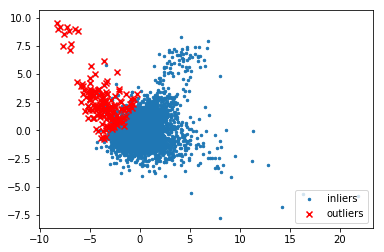

In [48]:
fig, ax = plt.subplots()
#snp.labs("throughput", "latency", "Toy Data: Server Responses")
ax.scatter(X[:, 0], X[:, 1], s=6, label="inliers")
ax.scatter(X[y==1, 0], X[y==1, 1], marker="x", color="r", label="outliers")
ax.legend(loc="lower right")

The above plot shows the original number of inliers and outliers in out dataset.

In [49]:
##EllipticEnvelop 
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.035
ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.035,
         random_state=None, store_precision=True, support_fraction=None)

In [50]:
# Binary prediction of normal vs. outlier
pred = ell.predict(X)
sum(pred == -1)  # Outlier points are predicted as -1

252

In [51]:
# Continuous output of the decision_function
decision = ell.decision_function(X)
decision.min(), decision.max()

(-692.472044664122, 28.762296991449677)

In [52]:
# Get the "thresholding" value from the decision function
threshold = stats.scoreatpercentile(ell.decision_function(X), 100*outlier_frac)
threshold

5.278980377831921e-16

In [53]:
# First make a meshgrid for the (x1, x2) feature space
x1s = np.linspace(np.min(X[:, 0])-5, np.max(X[:, 0])+5, 15)
x2s = np.linspace(np.min(X[:, 1])-5, np.max(X[:, 1])+5, 15)
x1grid, x2grid = np.meshgrid(x1s, x2s)

In [54]:
# Now make predictions for each point on the grid 
Xgrid = np.column_stack((x1grid.ravel(), x2grid.ravel()))  # Feature matrix containing all grid points
dens = ell.decision_function(Xgrid)
densgrid = dens.reshape(x1grid.shape)  # Reshape the vector of densities back onto the "grid"

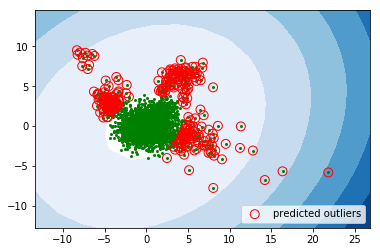

In [55]:
fig, ax = plt.subplots()
#snp.labs("throughput", "latency", "Outlier Decision Function Contours")
ax.contourf(x1grid, x2grid, densgrid, cmap=plt.cm.Blues_r, levels=np.linspace(dens.min(), threshold, 7))
ax.scatter(X[:, 0], X[:, 1], s=4, color="g")

# Pot circles around the predicted outliers
ax.scatter(X[pred == -1, 0], X[pred == -1, 1],  
           facecolors="none", edgecolors="red", s=80, label="predicted outliers")
ax.legend(loc="lower right")

In [56]:
y = y.astype(np.int8)
y[y==1] = -1
y[y==0] = 1

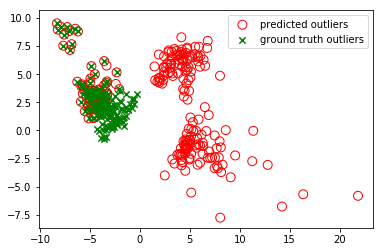

In [57]:
fig, ax = plt.subplots()
#plotting predicted outliers
ax.scatter(X[pred == -1, 0], X[pred == -1, 1],  
           facecolors="none", edgecolors="red", s=80, label="predicted outliers")

# Plot x's for the ground truth outliers
ax.scatter(X[y == -1, 0], X[y == -1, 1], marker="x", 
           color="g", s=40, label="ground truth outliers")

ax.legend(loc="upper right")

In [58]:
#3.1 OneSVM
# predicting the outliers using OneClassSVM
fraction=0.10
from sklearn.svm import OneClassSVM
ocs=OneClassSVM(nu=0.95 * fraction + 0.05,kernel="rbf", gamma=0.1)
ocs.fit(X)
pred_out=ocs.predict(X)
print(pred_out)
print(sum(pred_out))

[1 1 1 ... 1 1 1]
5110


In [59]:
# predicting the outliers using OneClassSVM
fraction=0.25
from sklearn.svm import OneClassSVM
ocs=OneClassSVM(nu=0.95 * fraction + 0.05,kernel="rbf", gamma=0.1)
ocs.fit(X)
pred_out=ocs.predict(X)
print(pred_out)

[ 1 -1 -1 ...  1  1  1]


In [60]:
print(sum(pred_out))

3058


<Figure size 432x288 with 0 Axes>

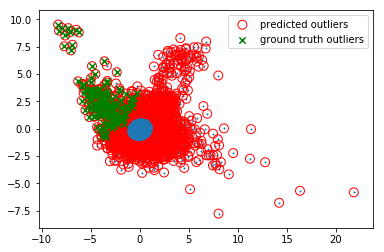

In [61]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
fig, ax = plt.subplots()
# Plot the reduced dimensionality data points
ax.scatter(X[:, 0], X[:, 1], s=4, lw=0)

ax.scatter(X[pred_out == -1, 0], X[pred_out == -1, 1],  
           facecolors="none", edgecolors="red", s=80, label="predicted outliers")

# Plot x's for the ground truth outliers
ax.scatter(X[y == -1, 0], X[y == -1, 1], marker="x", 
           color="g", s=40, label="ground truth outliers")
ax.legend()

Automatically created module for IPython interactive environment


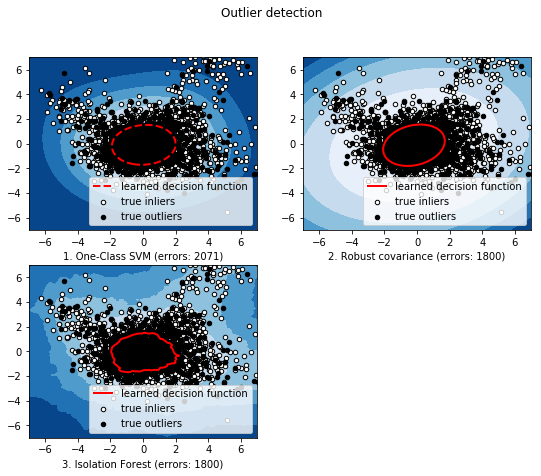

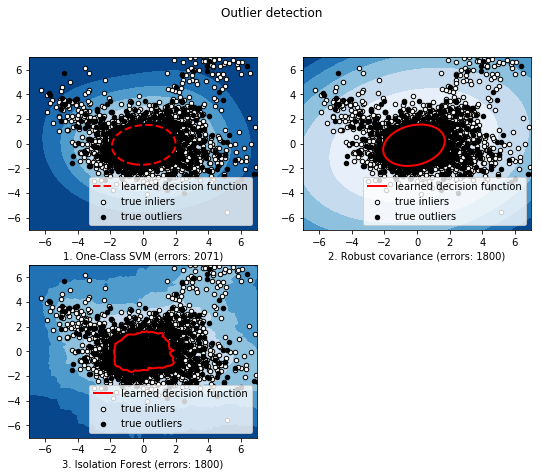

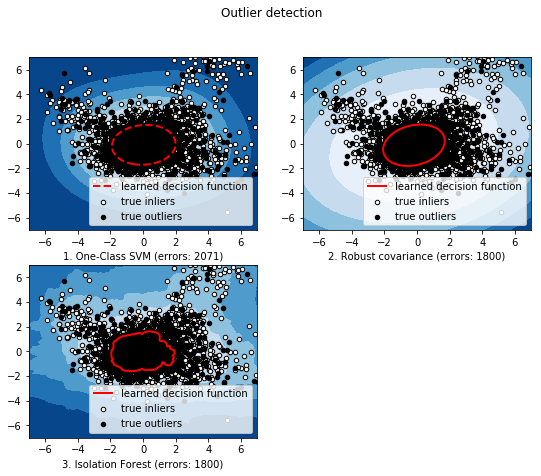

In [63]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

rng = np.random.RandomState(42)

# Example settings
n_samples = 7200
outliers_fraction = 0.25
clusters_separation = [1, 2, 3]

# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Fit the model
    plt.figure(figsize=(9, 7))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,
                                        100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                        linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                     colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                        s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                        s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.suptitle("Outlier detection")

plt.show()